# 23 Explore store data

## Setup

### Import packages

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import geopandas as gpd

from ydata_profiling import ProfileReport

### Set up display

In [4]:
pd.options.display.max_columns = 100

### Set working directory

In [5]:
%cd /data/p_dsi/teams2023/bridgestone_data/data/

/gpfs52/data/p_dsi/teams2023/bridgestone_data/data


In [3]:
store = pd.read_csv('store.csv', sep='|')

STORE_ID STATE_CODE  ZIP_CODE         MSA
0       244243         NE     68144         NaN
1       244240         NE     68134         NaN
2       244233         MO     64151         NaN
3       227602         KY     40272         NaN
4       227603         KY     40219         NaN
...        ...        ...       ...         ...
2809      2267         PA     15090  PITTSBURGH
2810    246650         CO     80002         NaN
2811    400645         NV     89410         NaN
2812    794382         SC     29455         NaN
2813    232364         IN     46254         NaN

[2814 rows x 4 columns]

In [13]:
print("Number of zip codes with store locations: ", len(store['ZIP_CODE'].unique()))
print("Any NA values in zip code column? ", len(store[store['ZIP_CODE'].isna()]))

Number of zip codes with store locations:  2374
Any NA values in zip code column?  0


In [33]:
product = pd.read_csv('product.csv', sep='|')

ARTICLE_ID  PROD_GROUP_CODE PROD_GROUP_DESC  CATEGORY_CODE  \
0           45438              5.0           Tires           26.0   
1           20257              5.0           Tires           26.0   
2           53872              5.0           Tires           26.0   
3           20192              5.0           Tires           26.0   
4           45500              5.0           Tires           26.0   
...           ...              ...             ...            ...   
56837     7053192              4.0        Services       117974.0   
56838     7001052              4.0        Services           81.0   
56839     7001053              3.0           Other            6.0   
56840     7053195              4.0        Services       117974.0   
56841     7053191              4.0        Services       117974.0   

                CATEGORY_DESC  SEGMENT_CODE                      SEGMENT_DESC  \
0             Passenger Tires          29.0                 Performance Tires   
1             Passenger Tires          29.0                 Performance Tires   
2             Passenger Tires          29.0                 Performance Tires   
3             Passenger Tires          29.0                 Performance Tires   
4             Passenger Tires          29.0                 Performance Tires   
...                       ...           ...                               ...   
56837       EV/Hybrid Systems      117976.0  EV/Hybrid Inspections & Services   
56838  Miscellaneous Services         115.0                Employee Discounts   
56839                   Other       20580.0            Employee Tire Discount   
56840       EV/Hybrid Systems      117976.0  EV/Hybrid Inspections & Services   
56841       EV/Hybrid Systems      117976.0  EV/Hybrid Inspections & Services   

       CLASS_CODE                           CLASS_DESC DISCOUNT_FLAG  \
0            37.0                S/T Performance Tires             N   
1            37.0                S/T Performance Tires             N   
2            37.0                S/T Performance Tires             N   
3            37.0                S/T Performance Tires             N   
4            37.0                S/T Performance Tires             N   
...           ...                                  ...           ...   
56837    117979.0             Other EV/Hybrid Services             N   
56838       508.0          Employee Discounts Services             E   
56839    125366.0  Teammate Best Tire Savings Discount             E   
56840    117979.0             Other EV/Hybrid Services             N   
56841    117979.0             Other EV/Hybrid Services             N   

      CROSS_SECTION ASPECT_RATIO RIM_SIZE  
0               195           60       14  
1               225           60       16  
2               215           60       14  
3               195           65       15  
4               175           70       13  
...             ...          ...      ...  
56837           NaN          NaN      NaN  
56838           NaN          NaN      NaN  
56839           NaN          NaN      NaN  
56840           NaN          NaN      NaN  
56841           NaN          NaN      NaN  

[56842 rows x 13 columns]

In [5]:
dat_201711 = pd.read_csv('sales_20171130.csv', sep='|')
dat_201711.head(10)

STORE_ID    TRAN_ID        DATE  ARTICLE_ID     INDIV_ID  VEHICLE_ID  \
0     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
1     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
2     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
3     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
4     16926  992052810  2017-11-30     7029718  637925357.0   928430923   
5     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
6     16926  992052810  2017-11-30     7034653  637925357.0   928430923   
7     16926  992052810  2017-11-30     7006949  637925357.0   928430923   
8     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
9     16926  992052810  2017-11-30     7046930  637925357.0   928430923   

   UNITS  SALES  
0    0.0   0.00  
1    0.0   0.00  
2    0.0  -1.28  
3    0.0  -7.95  
4    0.0   5.00  
5    0.0  -0.77  
6    1.0  26.00  
7    1.0   4.99  
8    0.0   0.00  
9    0.0   0.00

In [34]:
dat_201711_merged1 = pd.merge(dat_201711, store, on='STORE_ID')

In [37]:
dat_201711_merged2 = pd.merge(dat_201711_merged1, product, on='ARTICLE_ID')

STORE_ID    TRAN_ID        DATE  ARTICLE_ID     INDIV_ID  \
0            16926  992052810  2017-11-30     7001674  637925357.0   
1            16926  992052810  2017-11-30     7001674  637925357.0   
2            16926  992052810  2017-11-30     7001674  637925357.0   
3            16926  992052810  2017-11-30     7001674  637925357.0   
4            16926  992052810  2017-11-30     7001674  637925357.0   
...            ...        ...         ...         ...          ...   
15591786     23493  991372060  2017-11-30       97385  254348568.0   
15591787      2593  991689690  2017-11-14     7004634  321405837.0   
15591788      2593  991690830  2017-11-21        5124  271060637.0   
15591789     23841  991394450  2017-11-18     7007042  291950618.0   
15591790    678600  991551740  2017-11-29     7091284  256479638.0   

          VEHICLE_ID  UNITS    SALES STATE_CODE  ZIP_CODE         MSA  \
0          928430923    0.0     0.00         MN     55435  MINNEAPOLI   
1          928430923    0.0     0.00         MN     55435  MINNEAPOLI   
2          928430923    0.0    -1.28         MN     55435  MINNEAPOLI   
3          928430923    0.0    -7.95         MN     55435  MINNEAPOLI   
4          928430923    0.0    -0.77         MN     55435  MINNEAPOLI   
...              ...    ...      ...        ...       ...         ...   
15591786           1    2.0   293.98         WY     82801  NON-MET WY   
15591787   946804580    0.0  -117.00         CA     90606  LOS ANGELE   
15591788   874701751    1.0     0.00         CA     90606  LOS ANGELE   
15591789   953397544    0.0   101.98         OR     97030  PORTLAND,O   
15591790   966638227    4.0  1051.96         TX     79701  MIDLAND,TX   

          PROD_GROUP_CODE PROD_GROUP_DESC  CATEGORY_CODE  \
0                     4.0        Services           74.0   
1                     4.0        Services           74.0   
2                     4.0        Services           74.0   
3                     4.0        Services           74.0   
4                     4.0        Services           74.0   
...                   ...             ...            ...   
15591786              5.0           Tires           26.0   
15591787              4.0        Services           81.0   
15591788              5.0           Tires           26.0   
15591789              4.0        Services           73.0   
15591790              5.0           Tires           44.0   

                   CATEGORY_DESC  SEGMENT_CODE             SEGMENT_DESC  \
0                 Engine Systems         106.0     Lubrication Services   
1                 Engine Systems         106.0     Lubrication Services   
2                 Engine Systems         106.0     Lubrication Services   
3                 Engine Systems         106.0     Lubrication Services   
4                 Engine Systems         106.0     Lubrication Services   
...                          ...           ...                      ...   
15591786         Passenger Tires        1135.0            Snow Tires-PS   
15591787  Miscellaneous Services         114.0      Non-System Services   
15591788         Passenger Tires          27.0                  Touring   
15591789           Brake Systems         102.0            Brake Service   
15591790       Light Truck Tires       80606.0  Commercial/Recreational   

          CLASS_CODE                 CLASS_DESC DISCOUNT_FLAG CROSS_SECTION  \
0              389.0                 Oil Change             Y           NaN   
1              389.0                 Oil Change             Y           NaN   
2              389.0                 Oil Change             Y           NaN   
3              389.0                 Oil Change             Y           NaN   
4              389.0                 Oil Change             Y           NaN   
...              ...                        ...           ...           ...   
15591786      1136.0                 Snow Tires             N           285   
15591787       502.0  Other Non-System

### Scrap

In [21]:
# drop the columns that don't want for store analysis
dat_201711_dropped = dat_201711.drop(['DATE', 'INDIV_ID', 'VEHICLE_ID', 'TRAN_ID'], axis=1)

STORE_ID  ARTICLE_ID  UNITS   SALES
0            16926     7001674    0.0    0.00
1            16926     7001674    0.0    0.00
2            16926     7001674    0.0   -1.28
3            16926     7001674    0.0   -7.95
4            16926     7029718    0.0    5.00
...            ...         ...    ...     ...
15591786     23248        6036    4.0  352.04
15591787    652164     7001708    0.0    0.00
15591788    321993     7013632    0.0   55.56
15591789     18511     7046930    0.0    0.00
15591790      6300     7034655    1.0   26.00

[15591791 rows x 4 columns]

In [25]:
dat_201711_grouped = dat_201711_dropped.groupby(by=['STORE_ID','ARTICLE_ID']).sum()

UNITS     SALES
STORE_ID ARTICLE_ID                 
27       11            4.0    727.96
         184          12.0   2399.88
         189           1.0    226.99
         240           1.0     97.99
         449           1.0    191.99
...                    ...       ...
787742   7099614       6.0    293.50
         7099615      16.0    994.50
         7099616      75.0   9919.48
         7099617      12.0   1943.56
         7099618      66.0  12585.24

[1276809 rows x 2 columns]

In [26]:
merged_201711 = pd.merge(dat_201711_grouped, store, on='STORE_ID')

STORE_ID  UNITS     SALES STATE_CODE  ZIP_CODE         MSA
0              27    4.0    727.96         NH      3101  MANCHESTER
1              27   12.0   2399.88         NH      3101  MANCHESTER
2              27    1.0    226.99         NH      3101  MANCHESTER
3              27    1.0     97.99         NH      3101  MANCHESTER
4              27    1.0    191.99         NH      3101  MANCHESTER
...           ...    ...       ...        ...       ...         ...
1276804    787742    6.0    293.50         FL     32601  GAINESVILL
1276805    787742   16.0    994.50         FL     32601  GAINESVILL
1276806    787742   75.0   9919.48         FL     32601  GAINESVILL
1276807    787742   12.0   1943.56         FL     32601  GAINESVILL
1276808    787742   66.0  12585.24         FL     32601  GAINESVILL

[1276809 rows x 6 columns]

## Distribution of Product Sales Across Stores

In [27]:
total_sales_per_store = merged_201711.groupby('STORE_ID').sum()

UNITS      SALES  ZIP_CODE
STORE_ID                             
27        2419.0  171356.03   2021852
35        2003.0   97232.89   9879720
43        3274.0  161005.28  11961012
78        2725.0  129062.54  30383856
86        2571.0  132321.68   3899889
...          ...        ...       ...
787728    4955.0  181507.32  24701940
787729    1768.0   65799.23  16516929
787740    2307.0  125737.50  16564864
787741    1064.0   48270.02  11237546
787742    2864.0  147691.00  16626510

[2209 rows x 3 columns]

Text(0.5, 1.0, 'Distribution of Sales by Store (Nov 2017)')

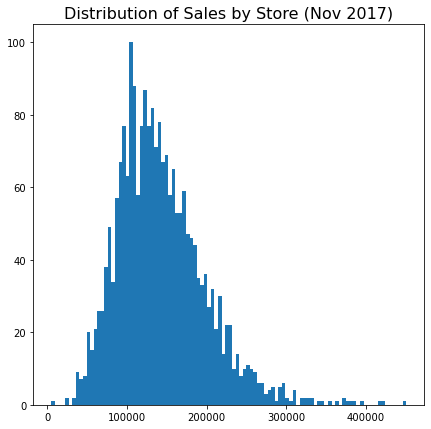

In [28]:
plt.figure(figsize=(7,7))
plt.hist(total_sales_per_store['SALES'], bins=100)
plt.title('Distribution of Sales by Store (Nov 2017)', fontsize=16)

In [29]:
# create a column to represent sales per units sold
total_sales_per_store['SALES_PER_UNIT'] = total_sales_per_store['SALES']/total_sales_per_store['UNITS']

UNITS      SALES  ZIP_CODE  SALES_PER_UNIT
STORE_ID                                             
27        2419.0  171356.03   2021852       70.837549
35        2003.0   97232.89   9879720       48.543630
43        3274.0  161005.28  11961012       49.176933
78        2725.0  129062.54  30383856       47.362400
86        2571.0  132321.68   3899889       51.467009
...          ...        ...       ...             ...
787728    4955.0  181507.32  24701940       36.631144
787729    1768.0   65799.23  16516929       37.216759
787740    2307.0  125737.50  16564864       54.502601
787741    1064.0   48270.02  11237546       45.366560
787742    2864.0  147691.00  16626510       51.568087

[2209 rows x 4 columns]

Text(0.5, 1.0, 'Distribution of Sales per Unit, by Store (Nov 2017)')

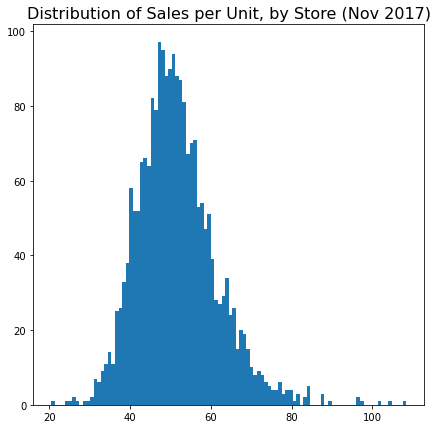

In [13]:
plt.figure(figsize=(7,7))
plt.hist(total_sales_per_store['SALES_PER_UNIT'], bins=100)
plt.title('Distribution of Sales per Unit, by Store (Nov 2017)', fontsize=16)

In [30]:
total_sales_per_store['SALES_PER_UNIT'].describe()

count    2209.000000
mean       51.540127
std         9.753448
min        20.410270
25%        45.084910
50%        50.600885
75%        56.767345
max       108.357802
Name: SALES_PER_UNIT, dtype: float64

In November 2017, the range of tire sales per units across individual stores was approximately /$20 to /$108. Stores averaged a tire sales per unit of /$51.54, with a standard deviation of approx. /$10. 

## Sales Across the U.S. Heatmaps

In [8]:
grouped = test.groupby('STATE_CODE').sum()

STORE_ID           TRAN_ID      ARTICLE_ID      INDIV_ID  \
STATE_CODE                                                                 
AL           57406573507   286597046899070   1981892806509  9.635852e+13   
AR           14132998874    94685257917920    651234549757  3.304174e+13   
AZ          134620227867   357810724787950   2488228991554  1.385721e+14   
CA          139972392821  1095282018120810   7523311957462  3.801973e+14   
CO           65884261036   323973383571700   2237476825012  1.109881e+14   
CT           32795988865   226704204951640   1562440486728  7.704289e+13   
DC            1405304586     3962083345200     27487988196  1.389989e+12   
DE             398446024    38882241115310    269045778470  1.313849e+13   
FL          548363219702  2195154090900110  15092583498901  7.571190e+14   
GA          137958241729   683634727110090   4706470809755  2.313550e+14   
HI            4630886135    84861398598470    582473456828  2.982637e+13   
IA           36683895491   168128722364600   1152278015609  5.828794e+13   
ID              94270186     6360829188740     43658913607  2.231047e+12   
IL          122102468131   631333400274350   4359530472803  2.178600e+14   
IN           42791251128   274605778027150   1894559326210  9.425178e+13   
KS           42410864307   211338008723260   1449537139640  7.066306e+13   
KY           19468216379   121942993954570    835409100060  4.177076e+13   
LA           15540095844   161355823631180   1096944875106  5.597288e+13   
MA           28836147623   215832737169810   1483041985953  7.673620e+13   
MD           61329152003   302413899715130   2086754760407  1.048070e+14   
MI            5952648016   177371429082990   1222826473972  6.168405e+13   
MN          100577508838   441291076509970   3035768788730  1.520975e+14   
MO           56920205009   351290058658110   2420958915854  1.183376e+14   
MS           22526456831   135590460686540    931873922427  4.624969e+13   
MT            5454362178    22492093597090    153988561966  7.928696e+12   
NC          111108500086   506183965803570   3500665711052  1.743351e+14   
ND           11922420634    28115838994960    191224127421  1.011778e+13   
NE           18694604793   104912019985830    725496550121  3.621528e+13   
NH            2607266112    22349985159500    153780447531  7.683441e+12   
NJ           42363984033   395372944556250   2733834846064  1.352855e+14   
NM           22338659917    88337364087530    610707078581  3.085711e+13   
NV           62455492160   164103589265980   1134530538411  5.892832e+13   
NY           71320285791   365860111047000   2520432623879  1.257645e+14   
OH           98056551565   621260627173220   4279536184320  2.132941e+14   
OK          120063829072   373972157189240   2532923870195  1.234571e+14   
OR            4413776580    66091558517250    452341230218  2.355254e+13   
PA           88580203965   607532096633220   4194367560390  2.060088e+14   
RI           12657505308    45628811104900    314018999139  1.659505e+13   
SC           72118416943   336908301114020   2320920919452  1.161118e+14   
SD            4689192399    17367425707070    118389137267  6.227233e+12   
TN           94708470711   537526262461540   3703235902722  1.845176e+14   
TX          398122620794  1422989324083730   9801728995278  4.868942e+14   
UT           30178969753    63933623471070    440155048889  2.228230e+13   
VA           75489444029   466594037739030   3221862353873  1.593688e+14   
WA           29473568169   292644788339620   2022746427900  1.031373e+14   
WI           57611590102   287954871796590   1961297965509  9.961525e+13   
WV             159884162    25644849370280    176708869171  9.211872e+12   
WY            2351953152     8386176880800     57663063144  3.016622e+12   

                  VEHICLE_ID     UNITS        SALES      ZIP_CODE  
STATE_CODE                                                         
AL           267030102013181  112163.0   4597265.52   10370367420  
AR         

In [9]:
states = gpd.read_file('/home/nieusmjm/sp23-bridgestone-team7/US_shape/States_shapefile.shp')


In [10]:
merged = states.merge(grouped, left_on='State_Code', right_on='STATE_CODE')

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

<AxesSubplot:>

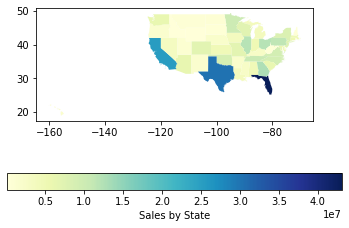

In [27]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
merged.plot(column='SALES', 
            cmap='YlGnBu',
            legend=True,
            legend_kwds={'label': "Sales by State",
                        'orientation': "horizontal"},
            ax=ax)


## Test Dataprep as EDA tool

### Install/import packages and load data

In [1]:
!pip install -U dataprep

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.9 MB 26 kB/s  eta 0:00:01
     |████████████████████████████████| 763 kB 115.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 11 kB/s /s eta 0:00:01
     |████████████████████████████████| 1.0 MB 11 kB/s /s eta 0:00:01
     |████████████████████████████████| 101 kB 253 kB/s  eta 0:00:01
     |████████████████████████████████| 458 kB 141.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 132.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 136.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 138.7 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 3.4 kB/s s eta 0:00:01
     |████████████████████████████████| 133 kB 1.1 kB/s s eta 0:00:01
     |████████████████████████████████| 2.2 MB 27 kB/s /s eta 0:00:01
     |████████████████████████████████| 233 kB 140.7 MB/s eta 0:00:01


     |████████████████████████████████| 49 kB 13.7 MB/s  eta 0:00:01


  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13918 sha256=c402c1dc807886ad25c0cf7a30d2ed78e5de5c0297aa6a1163b8e1c426f2f0f4
  Stored in directory: /gpfs52/home/nieusmjm/.cache/pip/wheels/b2/9e/d9/26be7687b8fe36cd6cacbec34e825a3dbcd3bae54017cfb385
Successfully built metaphone
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
distributed 2022.2.1 requires dask==2022.02.1, but you have dask 2023.3.0 which is incompatible.


In [18]:
import pandas as pd
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from dataprep.eda import plot, plot_correlation, plot_missing

In [19]:
%cd /data/p_dsi/teams2023/bridgestone_data/data/

/gpfs52/data/p_dsi/teams2023/bridgestone_data/data


In [20]:
store = pd.read_csv('store.csv', sep='|')

STORE_ID STATE_CODE  ZIP_CODE         MSA
0       244243         NE     68144         NaN
1       244240         NE     68134         NaN
2       244233         MO     64151         NaN
3       227602         KY     40272         NaN
4       227603         KY     40219         NaN
...        ...        ...       ...         ...
2809      2267         PA     15090  PITTSBURGH
2810    246650         CO     80002         NaN
2811    400645         NV     89410         NaN
2812    794382         SC     29455         NaN
2813    232364         IN     46254         NaN

[2814 rows x 4 columns]

In [21]:
dat_201711 = pd.read_csv('sales_20171130.csv', sep='|')

STORE_ID    TRAN_ID        DATE  ARTICLE_ID     INDIV_ID  VEHICLE_ID  \
0     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
1     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
2     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
3     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
4     16926  992052810  2017-11-30     7029718  637925357.0   928430923   
5     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
6     16926  992052810  2017-11-30     7034653  637925357.0   928430923   
7     16926  992052810  2017-11-30     7006949  637925357.0   928430923   
8     16926  992052810  2017-11-30     7001674  637925357.0   928430923   
9     16926  992052810  2017-11-30     7046930  637925357.0   928430923   

   UNITS  SALES  
0    0.0   0.00  
1    0.0   0.00  
2    0.0  -1.28  
3    0.0  -7.95  
4    0.0   5.00  
5    0.0  -0.77  
6    1.0  26.00  
7    1.0   4.99  
8    0.0   0.00  
9    0.0   0.00

In [14]:
# join store to dat_201711
merged_201711 = pd.merge(dat_201711, store, on='STORE_ID')

NameError: name 'dat_201711' is not defined

In [30]:
profile = ProfileReport(merged_201711, title="Profiling Report for Nov 2017 Sales in Stores")

In [31]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Time Series with master_sample and store data

Data preparation steps: 

1. Load data and drop unneeded columns

2. Convert DATE column to datatime64 data type

3. Set DATE column to index

In [156]:
df = pd.read_csv('master_sample.csv')

In [157]:
df_drop = df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'MZB_INDIV_ID', 'EMAIL_OPTIN_IND', 'AH1_RES_BUS_INDC', 'SUPP1_BUS_PANDER'], axis=1)

In [158]:
# Convert the date column to datetime64
df_drop.DATE = pd.to_datetime(df_drop.DATE)

In [80]:
# Set date column as index
df_drop.set_index('DATE', inplace=True)

In [29]:
# Subset df to have only date index and units sold
df_units = df_drop['UNITS']

DATE
2017-12-10    1.0
2017-01-19    4.0
2017-05-08    4.0
2017-08-21    4.0
2017-12-22    0.0
             ... 
2018-09-07    4.0
2018-04-20    0.0
2018-09-15    2.0
2018-01-10    4.0
2018-06-13    0.0
Name: UNITS, Length: 100000, dtype: float64

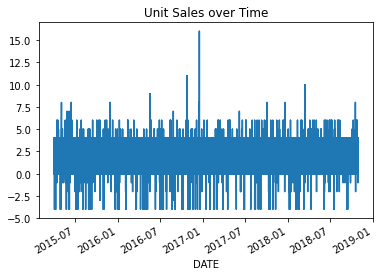

<Figure size 1440x1440 with 0 Axes>

In [35]:
# Test out a time series plot
df_units.plot(title='Unit Sales over Time')
plt.figure(figsize=(10,10))
plt.show()

It's clear from the above that the data will need to be manipulated further to have useful time series visualizations, but the above code chunks show the basic outline of what the data processing pipeline might look like. 

In [40]:
df_drop.head(10)

STORE_ID    TRAN_ID  ARTICLE_ID     INDIV_ID  VEHICLE_ID  UNITS  \
DATE                                                                          
2017-12-10      7404  991870990       15148  259319044.0   874667913    1.0   
2017-01-19    353233  990498000        3230  257556521.0   910960306    4.0   
2017-05-08     26530  991772130       11170  255051047.0   959944985    4.0   
2017-08-21    321264  991992640     7099618  256303625.0   412303013    4.0   
2017-12-22    548634  992082910     7091038  293077947.0   954404195    0.0   
2017-05-01    354586  990663860       95787  538763015.0   959040764    1.0   
2017-05-27    654884  993339500       97657  446381492.0   959847942    2.0   
2017-07-24    582336  992560660       15012  273068040.0   932064679    2.0   
2017-11-05    265753  991444740       97895  519459498.0   961223486    4.0   
2017-02-14      5770  991186610      122817  373160533.0   952217442    2.0   

             SALES  PROD_GROUP_CODE PROD_GROUP_DESC  CATEGORY_CODE  \
DATE                                                                 
2017-12-10   27.50              5.0           Tires           26.0   
2017-01-19  427.96              5.0           Tires           26.0   
2017-05-08  547.96              5.0           Tires           26.0   
2017-08-21  971.92              5.0           Tires           26.0   
2017-12-22  -76.76              5.0           Tires           26.0   
2017-05-01   61.99              5.0           Tires           26.0   
2017-05-27  237.98              5.0           Tires           26.0   
2017-07-24  245.98              5.0           Tires           26.0   
2017-11-05  499.96              5.0           Tires           26.0   
2017-02-14  299.98              5.0           Tires           26.0   

              CATEGORY_DESC  SEGMENT_CODE                SEGMENT_DESC  \
DATE                                                                    
2017-12-10  Passenger Tires          29.0           Performance Tires   
2017-01-19  Passenger Tires          29.0           Performance Tires   
2017-05-08  Passenger Tires          29.0           Performance Tires   
2017-08-21  Passenger Tires          31.0       Other Passenger Tires   
2017-12-22  Passenger Tires       80597.0            P-Metric CUV/SUV   
2017-05-01  Passenger Tires          27.0                     Touring   
2017-05-27  Passenger Tires       80597.0            P-Metric CUV/SUV   
2017-07-24  Passenger Tires          29.0           Performance Tires   
2017-11-05  Passenger Tires       80597.0            P-Metric CUV/SUV   
2017-02-14  Passenger Tires          30.0  P Metric Light Truck Tires   

            CLASS_CODE                  CLASS_DESC DISCOUNT_FLAG  \
DATE                                                               
2017-12-10        38.0      Performance All-Season             N   
2017-01-19        39.0         Touring H/V/Z Tires             N   
2017-05-08        38.0      Performance All-Season             N   
2017-08-21        43.0       Other Passenger Tires             N   
2017-12-22     81009.0  CUV/SUV Highway All-Season             Y   
2017-05-01        35.0               Economy Tires             N   
2017-05-27     81009.0  CUV/SUV Highway All-Season             N   
2017-07-24        38.0      Performance All-Season             N   
2017-11-05     81009.0  CUV/SUV Highway All-Season             N   
2017-02-14        41.0               Highway Tires             N   

           CROSS_SECTION ASPECT_RATIO RIM_SIZE STATE_CODE  ZIP_CODE  \
DATE                                                                  
2017-12-10           205           55       16         TX     76110   
2017-01-19           195           60       15         CO     80634   
2017-05-08           215           55       17         VA     22192   
2017-08-21          NONE         NONE     NONE         CT      6002   
2017-12-22          NONE         NONE     NONE         FL     33761   
2017-05-01           235       

In [67]:
# error issue: cannot reindex date column with a non-unique index
# re-loaded master_sample and dropped columns to remove DATE as the index

### Total Unit Sales Across All Stores

#### 2018

In [109]:
# set directory to team7/plots folder for saving
# %cd /data/p_dsi/teams2023/team7/plots

/gpfs52/data/p_dsi/teams2023/team7/plots


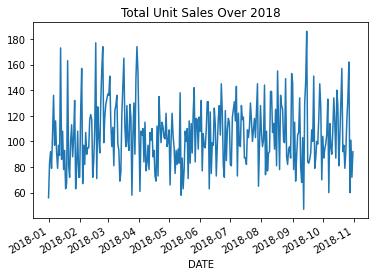

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [110]:
df_2018 = df_drop[df_drop.index >= '2018-01-01'].sort_index(axis=0)
#df_2018

df_2018_units = df_2018['UNITS'].groupby(level=0).sum()
#df_2018_units

df_2018_units.plot(title='Total Unit Sales Over 2018')
plt.figure(figsize=(10,10))
plt.show()

# save plot as png to folder
plt.savefig('2018-total-unit-sales.png')

#### 2017

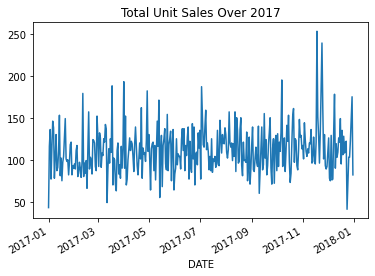

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [111]:
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-01-01')
df_2017 = df_drop[(df_drop.index >= start_date) & (df_drop.index < end_date)].sort_index(axis=0)
#df_2017

df_2017_units = df_2017['UNITS'].groupby(level=0).sum()
#df_2017_units

df_2017_units.plot(title='Total Unit Sales Over 2017')
plt.figure(figsize=(10,10))
plt.show()

# save plot as png to folder
plt.savefig('2017-total-unit-sales.png')

#### 2016

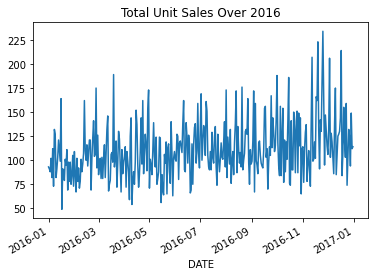

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [112]:
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2017-01-01')
df_2016 = df_drop[(df_drop.index >= start_date) & (df_drop.index < end_date)].sort_index(axis=0)
#df_2016

df_2016_units = df_2016['UNITS'].groupby(level=0).sum()
#df_2016_units

df_2016_units.plot(title='Total Unit Sales Over 2016')
plt.figure(figsize=(10,10))
plt.show()

# save plot as png to folder
plt.savefig('2016-total-unit-sales.png')

#### 2015

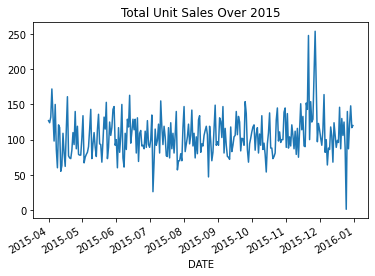

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [113]:
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2016-01-01')
df_2015 = df_drop[(df_drop.index >= start_date) & (df_drop.index < end_date)].sort_index(axis=0)
#df_2015

df_2015_units = df_2015['UNITS'].groupby(level=0).sum()
#df_2015_units

df_2015_units.plot(title='Total Unit Sales Over 2015')
plt.figure(figsize=(10,10))
plt.show()

# save plot as png to folder
plt.savefig('2015-total-unit-sales.png')

## Get total unit sales for each state, by year, and plot time series

In [114]:
df_drop

#start_date = pd.to_datetime('2015-01-01')
#end_date = pd.to_datetime('2016-01-01')
#df_2015 = df_drop[(df_drop.index >= start_date) & (df_drop.index < end_date)].sort_index(axis=0)
#df_2015

#df_2015_units = df_2015['UNITS'].groupby(level=0).sum()
#df_2015_units

#df_2015_units.plot(title='Total Unit Sales Over 2015')
#plt.figure(figsize=(10,10))
#plt.show()

# save plot as png to folder
#plt.savefig('2015-total-unit-sales.png')

STORE_ID    TRAN_ID  ARTICLE_ID     INDIV_ID  VEHICLE_ID  UNITS  \
DATE                                                                          
2017-12-10      7404  991870990       15148  259319044.0   874667913    1.0   
2017-01-19    353233  990498000        3230  257556521.0   910960306    4.0   
2017-05-08     26530  991772130       11170  255051047.0   959944985    4.0   
2017-08-21    321264  991992640     7099618  256303625.0   412303013    4.0   
2017-12-22    548634  992082910     7091038  293077947.0   954404195    0.0   
...              ...        ...         ...          ...         ...    ...   
2018-09-07     10561  991476930      114674  276996804.0   978043067    4.0   
2018-04-20     17736  991691720     7088988  524838474.0   964049510    0.0   
2018-09-15    241422  991316480        3432  279193368.0   929414807    2.0   
2018-01-10      7498  991902270       13584  269278998.0   966865305    4.0   
2018-06-13     26611  993070260     7088988  279270790.0   879863322    0.0   

             SALES  PROD_GROUP_CODE PROD_GROUP_DESC  CATEGORY_CODE  \
DATE                                                                 
2017-12-10   27.50              5.0           Tires           26.0   
2017-01-19  427.96              5.0           Tires           26.0   
2017-05-08  547.96              5.0           Tires           26.0   
2017-08-21  971.92              5.0           Tires           26.0   
2017-12-22  -76.76              5.0           Tires           26.0   
...            ...              ...             ...            ...   
2018-09-07  231.96              5.0           Tires           26.0   
2018-04-20  -32.40              5.0           Tires           26.0   
2018-09-15  131.98              5.0           Tires           26.0   
2018-01-10  431.96              5.0           Tires           26.0   
2018-06-13  -15.08              5.0           Tires           26.0   

              CATEGORY_DESC  SEGMENT_CODE           SEGMENT_DESC  CLASS_CODE  \
DATE                                                                           
2017-12-10  Passenger Tires          29.0      Performance Tires        38.0   
2017-01-19  Passenger Tires          29.0      Performance Tires        39.0   
2017-05-08  Passenger Tires          29.0      Performance Tires        38.0   
2017-08-21  Passenger Tires          31.0  Other Passenger Tires        43.0   
2017-12-22  Passenger Tires       80597.0       P-Metric CUV/SUV     81009.0   
...                     ...           ...                    ...         ...   
2018-09-07  Passenger Tires          27.0                Touring        35.0   
2018-04-20  Passenger Tires          27.0                Touring        36.0   
2018-09-15  Passenger Tires          27.0                Touring        33.0   
2018-01-10  Passenger Tires        1135.0          Snow Tires-PS      1136.0   
2018-06-13  Passenger Tires          27.0                Touring        36.0   

                            CLASS_DESC DISCOUNT_FLAG CROSS_SECTION  \
DATE                                                                 
2017-12-10      Performance All-Season             N           205   
2017-01-19         Touring H/V/Z Tires             N           195   
2017-05-08      Performance All-Season             N           215   
2017-08-21       Other Passenger Tires             N          NONE   
2017-12-22  CUV/SUV Highway All-Season             Y          NONE   
...                                ...           ...           ...   
2018-09-07               Economy Tires             N           205   
2018-04-20    Car & Minivan All-Season             Y          NONE   
2018-09-15           Mass Market Tires             N           225   
2018-01-10                  Snow Tires             N           215   
2018-06-13    Car & Minivan All-Season             Y          NONE   

           ASPECT_RATIO RIM_SIZE STATE_CODE  ZIP_CODE         MSA       MAKE  \
DATE                                     

In [168]:
# get list of state codes to loop over 
states_list = df_drop['STATE_CODE'].unique()

# check that list has 48 values in it
len(states_list)

years_list = ['2018', '2017', '2016', '2015']
years_datetime = pd.to_datetime[years_list]
years_datetime

TypeError: 'function' object is not subscriptable

In [153]:
df_drop

STORE_ID    TRAN_ID  ARTICLE_ID     INDIV_ID  VEHICLE_ID  UNITS  \
DATE                                                                          
2017-12-10      7404  991870990       15148  259319044.0   874667913    1.0   
2017-01-19    353233  990498000        3230  257556521.0   910960306    4.0   
2017-05-08     26530  991772130       11170  255051047.0   959944985    4.0   
2017-08-21    321264  991992640     7099618  256303625.0   412303013    4.0   
2017-12-22    548634  992082910     7091038  293077947.0   954404195    0.0   
...              ...        ...         ...          ...         ...    ...   
2018-09-07     10561  991476930      114674  276996804.0   978043067    4.0   
2018-04-20     17736  991691720     7088988  524838474.0   964049510    0.0   
2018-09-15    241422  991316480        3432  279193368.0   929414807    2.0   
2018-01-10      7498  991902270       13584  269278998.0   966865305    4.0   
2018-06-13     26611  993070260     7088988  279270790.0   879863322    0.0   

             SALES  PROD_GROUP_CODE PROD_GROUP_DESC  CATEGORY_CODE  \
DATE                                                                 
2017-12-10   27.50              5.0           Tires           26.0   
2017-01-19  427.96              5.0           Tires           26.0   
2017-05-08  547.96              5.0           Tires           26.0   
2017-08-21  971.92              5.0           Tires           26.0   
2017-12-22  -76.76              5.0           Tires           26.0   
...            ...              ...             ...            ...   
2018-09-07  231.96              5.0           Tires           26.0   
2018-04-20  -32.40              5.0           Tires           26.0   
2018-09-15  131.98              5.0           Tires           26.0   
2018-01-10  431.96              5.0           Tires           26.0   
2018-06-13  -15.08              5.0           Tires           26.0   

              CATEGORY_DESC  SEGMENT_CODE           SEGMENT_DESC  CLASS_CODE  \
DATE                                                                           
2017-12-10  Passenger Tires          29.0      Performance Tires        38.0   
2017-01-19  Passenger Tires          29.0      Performance Tires        39.0   
2017-05-08  Passenger Tires          29.0      Performance Tires        38.0   
2017-08-21  Passenger Tires          31.0  Other Passenger Tires        43.0   
2017-12-22  Passenger Tires       80597.0       P-Metric CUV/SUV     81009.0   
...                     ...           ...                    ...         ...   
2018-09-07  Passenger Tires          27.0                Touring        35.0   
2018-04-20  Passenger Tires          27.0                Touring        36.0   
2018-09-15  Passenger Tires          27.0                Touring        33.0   
2018-01-10  Passenger Tires        1135.0          Snow Tires-PS      1136.0   
2018-06-13  Passenger Tires          27.0                Touring        36.0   

                            CLASS_DESC DISCOUNT_FLAG CROSS_SECTION  \
DATE                                                                 
2017-12-10      Performance All-Season             N           205   
2017-01-19         Touring H/V/Z Tires             N           195   
2017-05-08      Performance All-Season             N           215   
2017-08-21       Other Passenger Tires             N          NONE   
2017-12-22  CUV/SUV Highway All-Season             Y          NONE   
...                                ...           ...           ...   
2018-09-07               Economy Tires             N           205   
2018-04-20    Car & Minivan All-Season             Y          NONE   
2018-09-15           Mass Market Tires             N           225   
2018-01-10                  Snow Tires             N           215   
2018-06-13    Car & Minivan All-Season             Y          NONE   

           ASPECT_RATIO RIM_SIZE STATE_CODE  ZIP_CODE         MSA       MAKE  \
DATE                                     

In [ ]:
df_drop['YEAR'] = df_drop['DATE'].dt.year
df_drop['MONTH'] = df_drop['DATE'].dt.month
df_indexed = df_drop.set_index(['YEAR', 'MONTH']).sort_index(axis=0)
df_indexed

In [167]:
df_indexed[df_indexed['YEAR'] == '2018']

KeyError: 'YEAR'

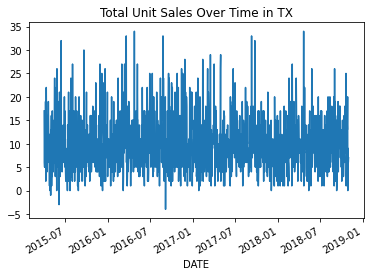

<Figure size 1080x720 with 0 Axes>

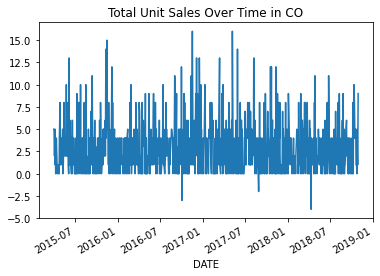

<Figure size 1080x720 with 0 Axes>

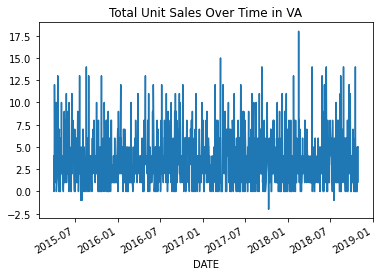

<Figure size 1080x720 with 0 Axes>

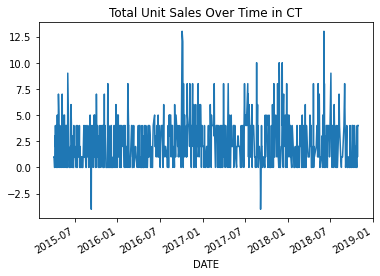

<Figure size 1080x720 with 0 Axes>

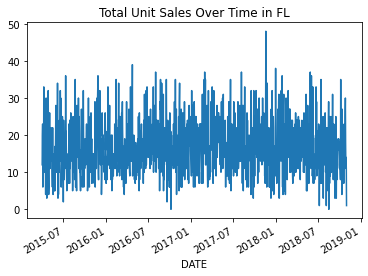

<Figure size 1080x720 with 0 Axes>

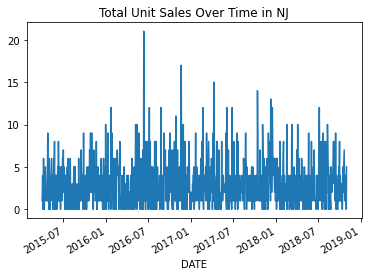

<Figure size 1080x720 with 0 Axes>

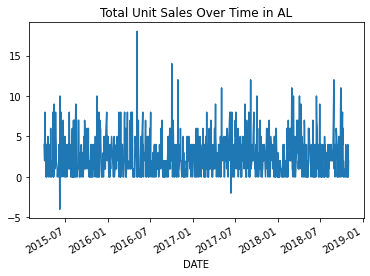

<Figure size 1080x720 with 0 Axes>

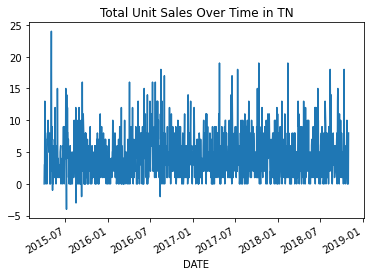

<Figure size 1080x720 with 0 Axes>

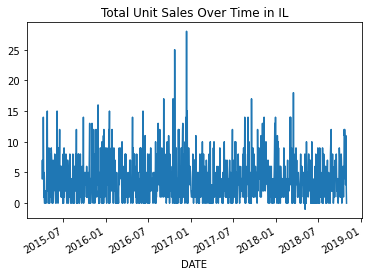

<Figure size 1080x720 with 0 Axes>

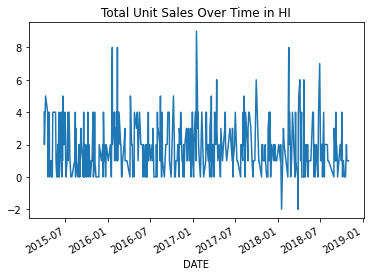

<Figure size 1080x720 with 0 Axes>

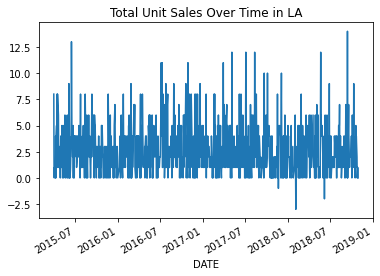

<Figure size 1080x720 with 0 Axes>

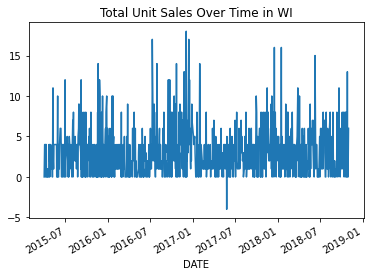

<Figure size 1080x720 with 0 Axes>

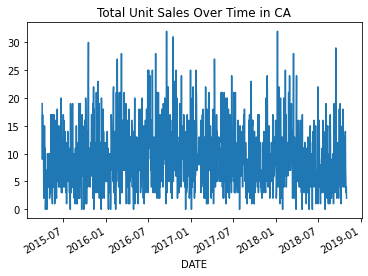

<Figure size 1080x720 with 0 Axes>

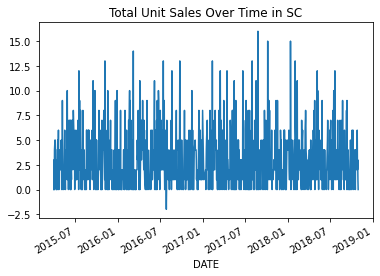

<Figure size 1080x720 with 0 Axes>

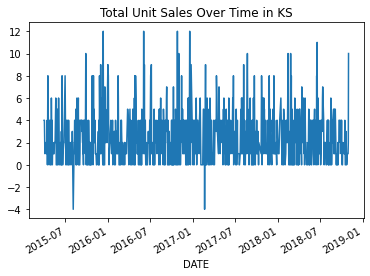

<Figure size 1080x720 with 0 Axes>

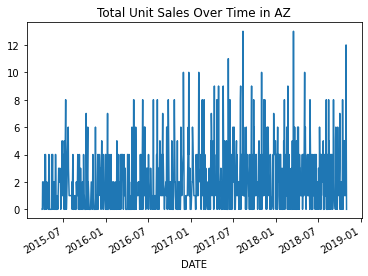

<Figure size 1080x720 with 0 Axes>

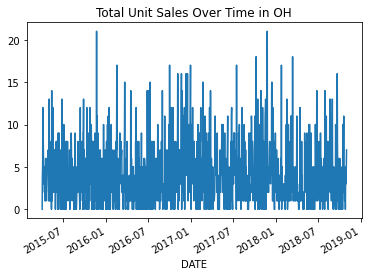

<Figure size 1080x720 with 0 Axes>

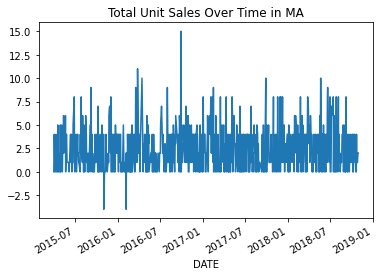

<Figure size 1080x720 with 0 Axes>

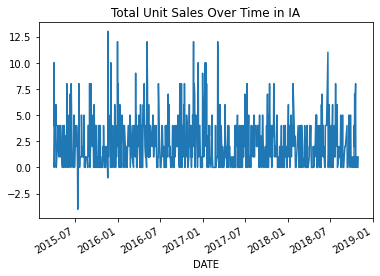

<Figure size 1080x720 with 0 Axes>

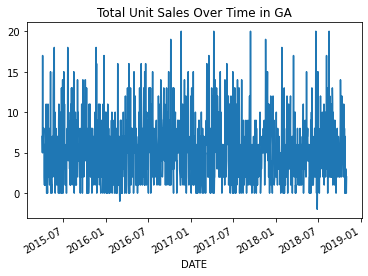

<Figure size 1080x720 with 0 Axes>

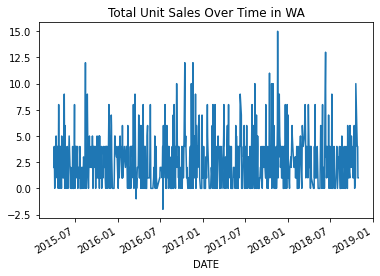

<Figure size 1080x720 with 0 Axes>

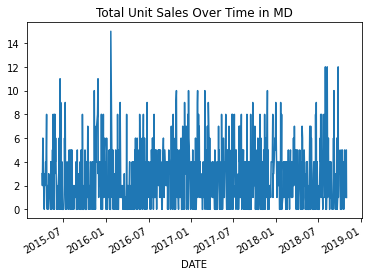

<Figure size 1080x720 with 0 Axes>

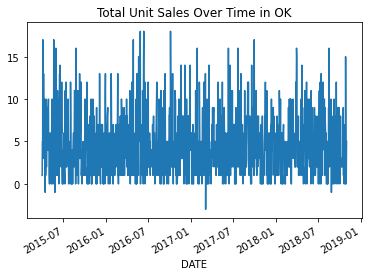

<Figure size 1080x720 with 0 Axes>

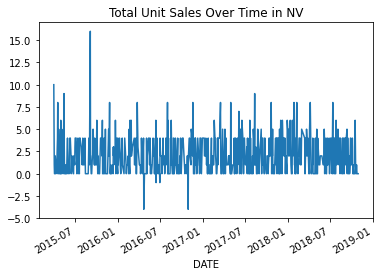

<Figure size 1080x720 with 0 Axes>

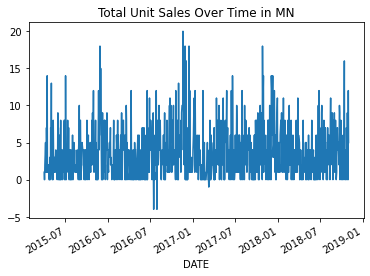

<Figure size 1080x720 with 0 Axes>

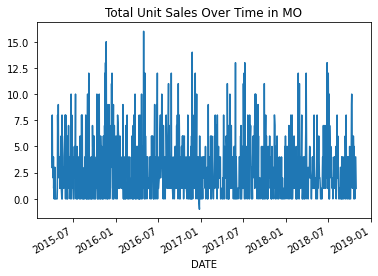

<Figure size 1080x720 with 0 Axes>

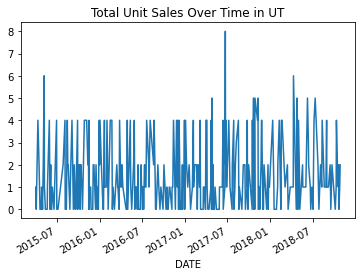

<Figure size 1080x720 with 0 Axes>

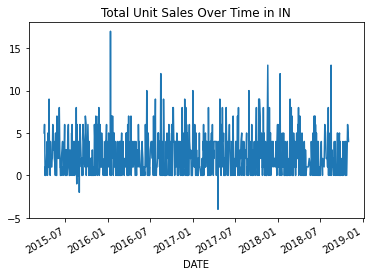

<Figure size 1080x720 with 0 Axes>

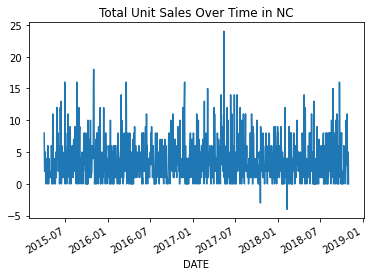

<Figure size 1080x720 with 0 Axes>

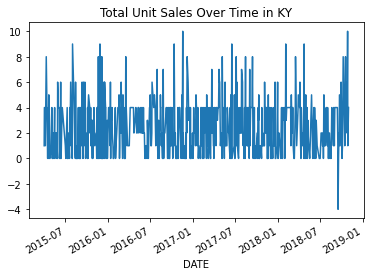

<Figure size 1080x720 with 0 Axes>

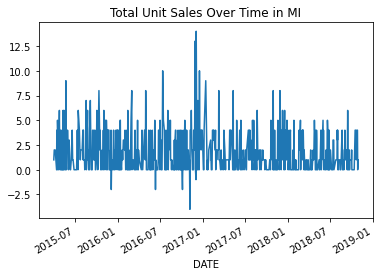

<Figure size 1080x720 with 0 Axes>

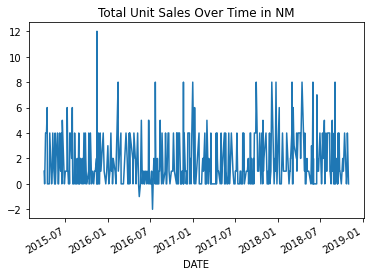

<Figure size 1080x720 with 0 Axes>

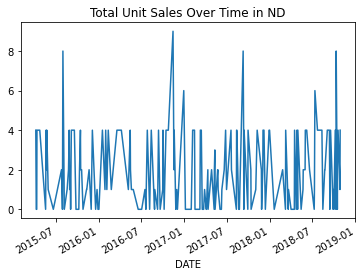

<Figure size 1080x720 with 0 Axes>

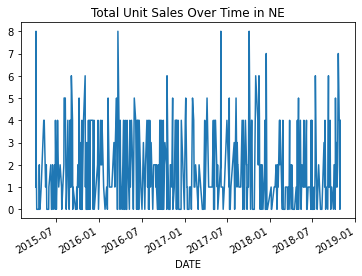

<Figure size 1080x720 with 0 Axes>

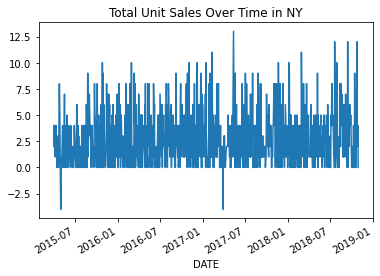

<Figure size 1080x720 with 0 Axes>

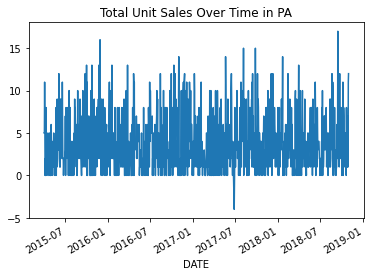

<Figure size 1080x720 with 0 Axes>

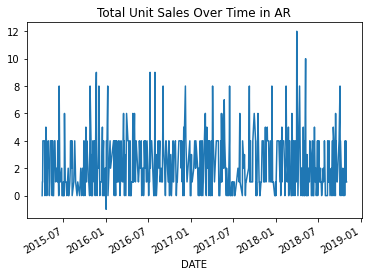

<Figure size 1080x720 with 0 Axes>

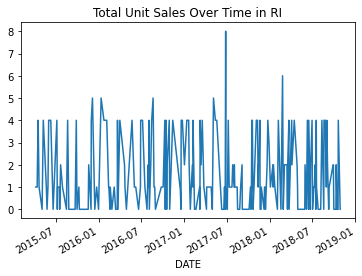

<Figure size 1080x720 with 0 Axes>

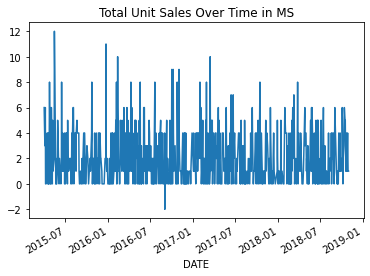

<Figure size 1080x720 with 0 Axes>

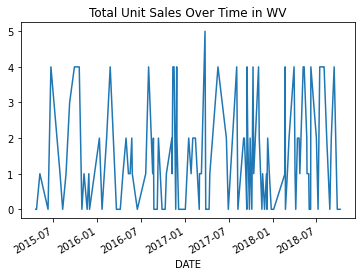

<Figure size 1080x720 with 0 Axes>

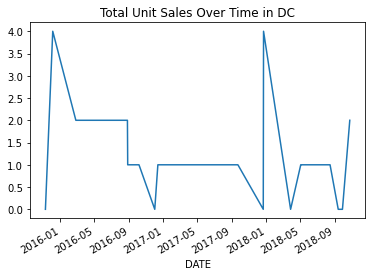

<Figure size 1080x720 with 0 Axes>

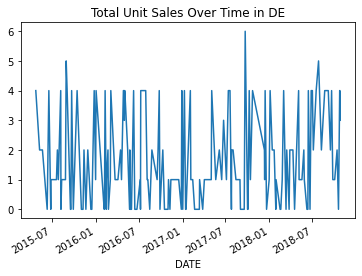

<Figure size 1080x720 with 0 Axes>

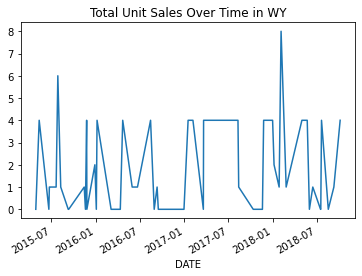

<Figure size 1080x720 with 0 Axes>

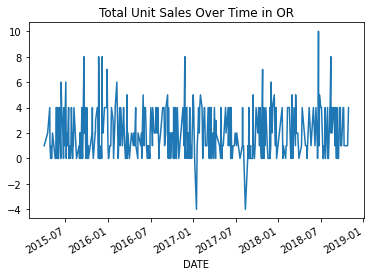

<Figure size 1080x720 with 0 Axes>

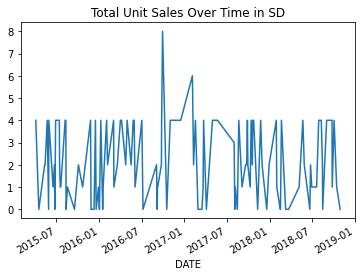

<Figure size 1080x720 with 0 Axes>

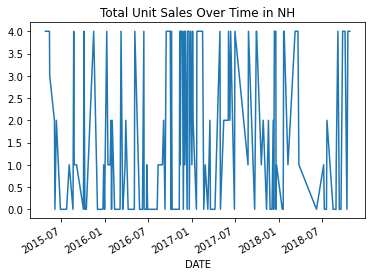

<Figure size 1080x720 with 0 Axes>

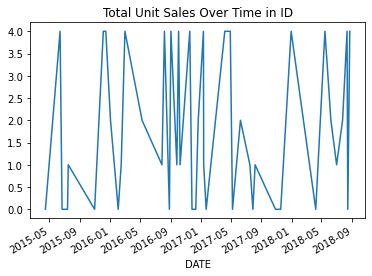

<Figure size 1080x720 with 0 Axes>

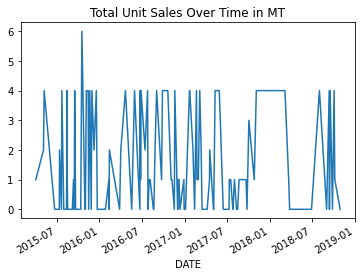

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [148]:
# TODO - troubleshoot save issues (can't see the plots) and add loop for year
for state in states_list:
    for year in years_list:
    
        # filter dataframe by state code
        temp = df_indexed[(df_indexed['STATE_CODE'] == state) & (df_indexed['YEAR'] == year)]

        # group df by date + sum up unit sales
        temp_units = temp['UNITS'].groupby(level=0).sum()

        # plot the time series graph
        temp_units.plot(title=(f'Total Unit Sales Over Time in {state}'))
        plt.figure(figsize=(15,10))
        plt.show()

        # save the figure
        plt.savefig(fname=f'{state}-total-unit-sales', format='png')

In [204]:
df = pd.read_csv('master_sample.csv', parse_dates=['DATE'], index_col=['DATE']).drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)


In [205]:
df = df.sort_index(axis=0)
df.head(10)

STORE_ID    TRAN_ID  ARTICLE_ID     INDIV_ID  VEHICLE_ID  UNITS  \
DATE                                                                          
2015-04-01    745097  990794290     7099718  303211740.0   937546786    2.0   
2015-04-01    260543  991331800         850  266755598.0   936878690    4.0   
2015-04-01     12122  991268030      106616  271156483.0   905304602    1.0   
2015-04-01    234483  991131550        3843  290169670.0   930583896    2.0   
2015-04-01     17663  991841860     7011082  291483083.0   932282250    0.0   
2015-04-01    260434  991226160     7012601  303335649.0   938088523    0.0   
2015-04-01     16322  991387910        2815  303371850.0   938076628    1.0   
2015-04-01    245789  991041410     7012601  261788377.0   686044185    0.0   
2015-04-01     19763  991073700       79042  303352253.0   938072641    2.0   
2015-04-01     23876  991354990       97946  292388329.0   928048828    1.0   

             SALES  MZB_INDIV_ID EMAIL_OPTIN_IND AH1_RES_BUS_INDC  \
DATE                                                                
2015-04-01  797.98   303211740.0               Y                R   
2015-04-01  471.96   266755598.0               Y                R   
2015-04-01    0.00   271156483.0               Y                U   
2015-04-01  167.98           NaN             NaN              NaN   
2015-04-01  -11.10   291483083.0               Y                R   
2015-04-01    0.00   303335649.0               Y                R   
2015-04-01   96.89           NaN             NaN              NaN   
2015-04-01    0.00   261788377.0               Y                R   
2015-04-01  235.98           NaN             NaN              NaN   
2015-04-01   12.52           NaN             NaN              NaN   

           SUPP1_BUS_PANDER  PROD_GROUP_CODE PROD_GROUP_DESC  CATEGORY_CODE  \
DATE                                                                          
2015-04-01                N              5.0           Tires           26.0   
2015-04-01                N              5.0           Tires           26.0   
2015-04-01                N              5.0           Tires           26.0   
2015-04-01              NaN              5.0           Tires           26.0   
2015-04-01                N              5.0           Tires           26.0   
2015-04-01                N              5.0           Tires           26.0   
2015-04-01              NaN              5.0           Tires           26.0   
2015-04-01                N              5.0           Tires           26.0   
2015-04-01              NaN              5.0           Tires           26.0   
2015-04-01              NaN              5.0           Tires           26.0   

              CATEGORY_DESC  SEGMENT_CODE                SEGMENT_DESC  \
DATE                                                                    
2015-04-01  Passenger Tires          31.0       Other Passenger Tires   
2015-04-01  Passenger Tires          30.0  P Metric Light Truck Tires   
2015-04-01  Passenger Tires          29.0           Performance Tires   
2015-04-01  Passenger Tires          30.0  P Metric Light Truck Tires   
2015-04-01  Passenger Tires          27.0                     Touring   
2015-04-01  Passenger Tires          27.0                     Touring   
2015-04-01  Passenger Tires          30.0  P Metric Light Truck Tires   
2015-04-01  Passenger Tires          27.0                     Touring   
2015-04-01  Passenger Tires          27.0                     Touring   
2015-04-01  Passenger Tires       80597.0            P-Metric CUV/SUV   

            CLASS_CODE                  CLASS_DESC DISCOUNT_FLAG  \
DATE                                                               
2015-04-01        43.0       Other Passenger Tires             N   
2015-04-01        41.0               Highway Tires             N   
2015-04-01        39.0         Touring H/V/Z Tires             N   
2015-04-01        41.0               Highway Tires             N   


In [208]:
#df['SHIFT'] = df['UNITS'].shift(periods=1)

#df['CHANGE'] = df.UNITS.div(df.SHIFT)
#df.head(10)

df[['UNITS', 'SHIFT', 'CHANGE']].head(10)

UNITS  SHIFT  CHANGE
DATE                            
2015-04-01    2.0    NaN     NaN
2015-04-01    4.0    2.0    2.00
2015-04-01    1.0    4.0    0.25
2015-04-01    2.0    1.0    2.00
2015-04-01    0.0    2.0    0.00
2015-04-01    0.0    0.0     NaN
2015-04-01    1.0    0.0     inf
2015-04-01    0.0    1.0    0.00
2015-04-01    2.0    0.0     inf
2015-04-01    1.0    2.0    0.50

In [212]:
df_downsamp = df.resample('M').mean()
df_downsamp[['UNITS', 'SALES']].head(10)

UNITS       SALES
DATE                            
2015-04-30  1.354630  150.985444
2015-05-31  1.410324  153.947463
2015-06-30  1.381352  147.113805
2015-07-31  1.343580  146.102975
2015-08-31  1.348670  150.972018
2015-09-30  1.343750  143.163926
2015-10-31  1.366510  149.750795
2015-11-30  1.284846  139.629500
2015-12-31  1.412511  157.007148
2016-01-31  1.396235  147.821854

In [215]:
r30 = df['UNITS'].rolling(window='30D').mean()
#r30


DATE
2015-04-01    2.000000
2015-04-01    3.000000
2015-04-01    2.333333
2015-04-01    2.250000
2015-04-01    1.800000
                ...   
2018-10-31    1.400089
2018-10-31    1.400354
2018-10-31    1.399734
2018-10-31    1.399115
2018-10-31    1.398496
Name: UNITS, Length: 100000, dtype: float64